<a href="https://colab.research.google.com/github/YounSooKimTech/Bamboo_Project/blob/main/Ethnicity_Classifier_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/name-ethnicity-classifier/name-ethnicity-classifier
! cd name-ethnicity-classifier/

Cloning into 'name-ethnicity-classifier'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 163 (delta 45), reused 71 (delta 26), pack-reused 58 (from 1)
Receiving objects: 100% (163/163), 25.56 MiB | 11.68 MiB/s, done.
Resolving deltas: 100% (55/55), done.


# Dataset

In [113]:
import pandas as pd

df = pd.read_stata('/content/directors_1996_2016_gvkey.dta')
df_sub = df[['dirid', 'first', 'last', "fullname", 'ethnicity']]

df_sub = df_sub.dropna(subset=["first", "last"])

df_sub

<ipython-input-113-0984d38b3044>:3: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df = pd.read_stata('/content/directors_1996_2016_gvkey.dta')


,dirid,first,last,fullname,ethnicity
0,1.0,james,preston,JAMES E PRESTON,C
1,1.0,james,preston,JAMES E PRESTON,C
2,1.0,james,preston,JAMES E PRESTON,U
3,1.0,james,preston,JAMES E PRESTON,U
4,1.0,james,preston,JAMES E PRESTON,C
...,...,...,...,...,...
294687,274771.0,kristen,ohara,KRISTEN O'HARA,CAUCASIAN
294688,274775.0,kenneth,slutsky,KENNETH SLUTSKY,CAUCASIAN
294689,276441.0,linda,yaccarino,LINDA YACCARINO,CAUCASIAN
294690,277023.0,gerald,chizever,GERALD CHIZEVER,CAUCASIAN


In [114]:
ethnicity_mapping = {
    # Caucasian-related
    'CAUCASIAN': 'Caucasian',
    'Caucasian': 'Caucasian',
    'C': 'Caucasian',

    # African-American-related
    'BLACK/AFRICAN AMERICAN': 'African-American',
    'AFRICAN-AMERICAN': 'African-American',
    'African-American': 'African-American',
    'B': 'African-American',

    # Hispanic-related
    'HISPANIC/LATIN AMERICAN': 'Hispanic',
    'HISPANIC': 'Hispanic',
    'Hispanic': 'Hispanic',
    'H': 'Hispanic',

    # Asian-related
    'ASIAN': 'Asian',
    'Asian': 'Asian',
    'INDIAN':'Indian',
    'MIDDLE-EASTERN': "Middle-Eastern",

    # Native-related
    'NATIVE AMERICAN/ALASKAN NATIVE': 'Native American',
    'Native American/': 'Native American',

    # Unknown-related
    'UNKNOWN': 'Unknown',
    'Unknown': 'Unknown',
    'unknown': 'Unknown',
    'U':'Unknown',
    'NOT AVAILABLE (SRI TEAM USE ONLY)': 'Unknown',
    'NOT AVAILABLE (SRI TEAM USE ON': 'Unknown',
    'NULL': 'Unknown',
    ' ': "Unknown",
    '': "Unknown",

    # Other specific cases
    'ACADEMIC': 'Other',
    'LORD': 'Other',
    'SIR': 'Other'
}

df_sub['ethnicity_recode'] = df_sub['ethnicity'].replace(ethnicity_mapping)

df_sub['ethnicity_recode'].value_counts()

,count
ethnicity_recode,
Caucasian,168295
Unknown,108826
African-American,10249
Asian,3477
Hispanic,3286
Indian,244
Middle-Eastern,172
Other,95
Native American,48


In [115]:
df_sub

,dirid,first,last,fullname,ethnicity,ethnicity_recode
0,1.0,james,preston,JAMES E PRESTON,C,Caucasian
1,1.0,james,preston,JAMES E PRESTON,C,Caucasian
2,1.0,james,preston,JAMES E PRESTON,U,Unknown
3,1.0,james,preston,JAMES E PRESTON,U,Unknown
4,1.0,james,preston,JAMES E PRESTON,C,Caucasian
...,...,...,...,...,...,...
294687,274771.0,kristen,ohara,KRISTEN O'HARA,CAUCASIAN,Caucasian
294688,274775.0,kenneth,slutsky,KENNETH SLUTSKY,CAUCASIAN,Caucasian
294689,276441.0,linda,yaccarino,LINDA YACCARINO,CAUCASIAN,Caucasian
294690,277023.0,gerald,chizever,GERALD CHIZEVER,CAUCASIAN,Caucasian


In [116]:
df_sub.to_csv("CEO_info_processed.csv", index=False)

In [117]:
df_cleaned = df_sub.sort_values(by=["dirid", "ethnicity_recode"])
df_cleaned = df_cleaned.drop_duplicates(subset="dirid", keep="first")
df_cleaned["ethnicity_recode"].value_counts()

,count
ethnicity_recode,
Caucasian,23215
Unknown,12660
African-American,1103
Asian,569
Hispanic,355
Indian,64
Middle-Eastern,29
Other,14
Native American,2


In [118]:
duplicate_count = df_cleaned["dirid"].duplicated().sum()
print(f"There are {duplicate_count} duplicate(s) in the dirid column.")


There are 0 duplicate(s) in the dirid column.


In [119]:
df_cleaned['names'] = df_cleaned["first"] + " " + df_cleaned['last']

duplicate_count = df_cleaned["names"].duplicated().sum()
print(f"There are {duplicate_count} duplicate(s) in the names column.")

duplicate_rows = df_cleaned[df_cleaned.duplicated(subset=["fullname"], keep=False)]
duplicate_rows



There are 4734 duplicate(s) in the names column.


,dirid,first,last,fullname,ethnicity,ethnicity_recode,names
238,13.0,robert,walter,ROBERT D WALTER,C,Caucasian,robert walter
1300,65.0,linn,draper,E. LINN DRAPER JR.,CAUCASIAN,Caucasian,linn draper
2275,108.0,william,cavanaugh,WILLIAM CAVANAUGH III,CAUCASIAN,Caucasian,william cavanaugh
2638,128.0,reuben,mark,REUBEN MARK,C,Caucasian,reuben mark
2867,140.0,george,davidson,GEORGE A DAVIDSON JR,C,Caucasian,george davidson
...,...,...,...,...,...,...,...
294394,232663.0,eric,chen,XUN (ERIC) CHEN,ASIAN,Asian,eric chen
294574,250294.0,patrick,ward,PATRICK JOSEPH WARD,CAUCASIAN,Caucasian,patrick ward
294611,252095.0,david,powers,DAVID POWERS,CAUCASIAN,Caucasian,david powers
294618,252895.0,scott,galloway,SCOTT GALLOWAY,CAUCASIAN,Caucasian,scott galloway


In [120]:
#df_cleaned = df_cleaned[~df_cleaned['ethnicity_recode'].isin(["Unknown", "Other"])]

df_cleaned["ethnicity_recode"].value_counts()

,count
ethnicity_recode,
Caucasian,23215
Unknown,12660
African-American,1103
Asian,569
Hispanic,355
Indian,64
Middle-Eastern,29
Other,14
Native American,2


# Algorithm Model

In [121]:
df_cleaned["names"]

,names
0,james preston
28,charles miller
48,philip neal
67,peter mullin
83,richard ferry
...,...
294687,kristen ohara
294688,kenneth slutsky
294689,linda yaccarino
294690,gerald chizever


In [122]:
df_cleaned["names"].to_csv("exec_names.csv", index=False)

!cd name-ethnicity-classifier && python predict_ethnicity.py -i "/content/exec_names.csv" -o "/content/8_model_output.csv" -m 8_groups -b 128

df_predict = pd.read_csv("/content/8_model_output.csv")
df_predict.sort_values(by="confidences", ascending=False)

df_predict["predictions"].value_counts()


/content/name-ethnicity-classifier/predict_ethnicity.py:256: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location={"cuda:0

,count
predictions,
Celtic,21620
European,6009
African,4570
Nordic,2030
Hispanic,2011
EastAsian,695
SouthAsian,561
Muslim,514


In [66]:
df_predict

,names,predictions,confidences
0,james preston,Celtic,92.524
1,charles miller,Celtic,76.863
2,philip neal,Celtic,90.280
3,peter mullin,Celtic,78.508
4,richard ferry,Celtic,80.348
...,...,...,...
25332,kristen ohara,African,65.355
25333,kenneth slutsky,Nordic,86.015
25334,linda yaccarino,Celtic,71.557
25335,gerald chizever,African,87.393


In [100]:
import pandas as pd

df_predict = pd.read_csv("/content/output.csv")


In [101]:
# Define the mapping dictionary
ethnicity_mapping = {
    "Celtic": "Caucasian",
    "European": "Caucasian",
    "African": "African American",
    "Hispanic": "Hispanic",
    "Nordic": "Caucasian",
    "EastAsian": "Asian",
    "SouthAsian": "Indian",
    "Muslim": "Middle-Eastern"
}

# Recode the column
df_predict["ethnicity_predicted"] = df_predict['predictions'].replace(ethnicity_mapping)

df_predict["ethnicity_predicted"].value_counts()


,count
ethnicity_predicted,
Caucasian,19555
African American,3047
Hispanic,1464
Asian,528
Indian,394
Middle-Eastern,349


# accuracy of the dataset

In [102]:
df_cleaned

,dirid,first,last,fullname,ethnicity,ethnicity_recode,names
0,1.0,james,preston,JAMES E PRESTON,C,Caucasian,james preston
28,2.0,charles,miller,CHARLES D MILLER,C,Caucasian,charles miller
48,3.0,philip,neal,PHILIP M NEAL,C,Caucasian,philip neal
67,4.0,peter,mullin,PETER W MULLIN,C,Caucasian,peter mullin
83,5.0,richard,ferry,RICHARD M FERRY,CAUCASIAN,Caucasian,richard ferry
...,...,...,...,...,...,...,...
294687,274771.0,kristen,ohara,KRISTEN O'HARA,CAUCASIAN,Caucasian,kristen ohara
294688,274775.0,kenneth,slutsky,KENNETH SLUTSKY,CAUCASIAN,Caucasian,kenneth slutsky
294689,276441.0,linda,yaccarino,LINDA YACCARINO,CAUCASIAN,Caucasian,linda yaccarino
294690,277023.0,gerald,chizever,GERALD CHIZEVER,CAUCASIAN,Caucasian,gerald chizever


In [103]:
df_predict

,names,predictions,confidences,ethnicity_predicted
0,james preston,Celtic,92.524,Caucasian
1,charles miller,Celtic,76.863,Caucasian
2,philip neal,Celtic,90.280,Caucasian
3,peter mullin,Celtic,78.508,Caucasian
4,richard ferry,Celtic,80.348,Caucasian
...,...,...,...,...
25332,kristen ohara,African,65.355,African American
25333,kenneth slutsky,Nordic,86.015,Caucasian
25334,linda yaccarino,Celtic,71.557,Caucasian
25335,gerald chizever,African,87.393,African American


In [104]:
import pandas as pd

df_merge = pd.merge(df_cleaned, df_predict, on="names", how="left")

df_merge["correct"] = df_merge["ethnicity_recode"] == df_merge["ethnicity_predicted"]

df_merge["correct"].value_counts()


,count
correct,
True,24281
False,6978


In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
confusion_matrix = pd.crosstab(df_merge["ethnicity_recode"], df_merge["ethnicity_predicted"], normalize="index")
confusion_matrix = confusion_matrix.iloc[:-1]

# Display the normalized confusion matrix
print(confusion_matrix)


ethnicity_predicted  African American     Asian  Caucasian  Hispanic  \
ethnicity_recode                                                       
African-American             0.115549  0.135521   0.655492  0.047076   
Asian                        0.054839  0.433871   0.122581  0.054839   
Caucasian                    0.116478  0.005394   0.820880  0.041796   
Hispanic                     0.022222  0.004938   0.083951  0.859259   
Indian                       0.015152  0.030303   0.015152  0.000000   
Middle-Eastern               0.068966  0.000000   0.172414  0.034483   

ethnicity_predicted    Indian  Middle-Eastern  
ethnicity_recode                               
African-American     0.033524        0.012839  
Asian                0.216129        0.117742  
Caucasian            0.006577        0.008874  
Hispanic             0.017284        0.012346  
Indian               0.848485        0.090909  
Middle-Eastern       0.034483        0.689655  


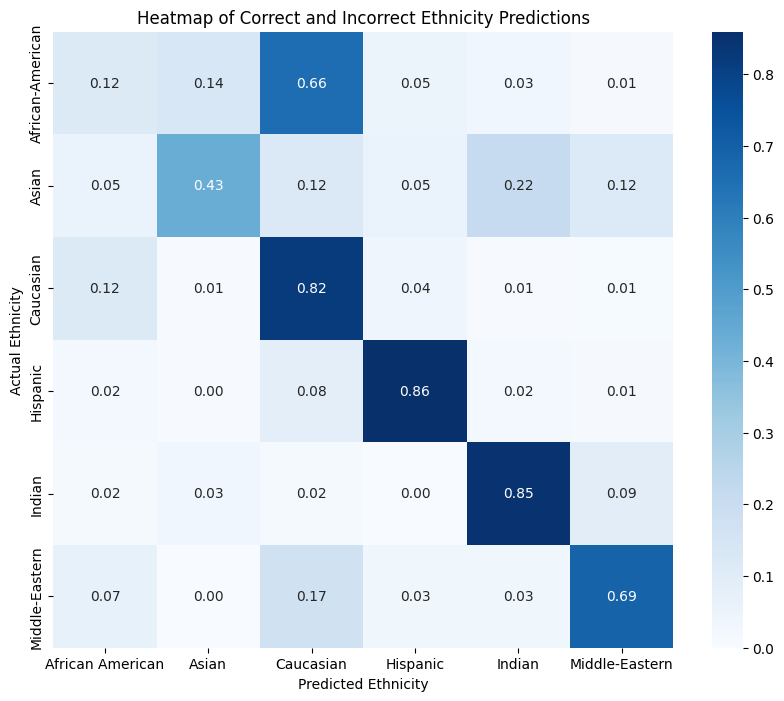

In [106]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt=".2f", cmap="Blues", cbar=True)

# Add labels and title
plt.title("Heatmap of Correct and Incorrect Ethnicity Predictions")
plt.xlabel("Predicted Ethnicity")
plt.ylabel("Actual Ethnicity")

# Show the plot
plt.show()


# East Asian Predictions only


In [79]:
!cd name-ethnicity-classifier && python predict_ethnicity.py -i "/content/exec_names.csv" -o "/content/chinese_output.csv" -m chinese_and_else -b 128

df_predict = pd.read_csv("/content/chinese_output.csv")
df_predict.sort_values(by="confidences", ascending=False)

df_predict["predictions"].value_counts()

/content/name-ethnicity-classifier/predict_ethnicity.py:256: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location={"cuda:0

,count
predictions,
else,24974
chinese,363


In [80]:
!cd name-ethnicity-classifier && python predict_ethnicity.py -i "/content/exec_names.csv" -o "/content/japanese_output.csv" -m japanese_and_else -b 128

df_predict = pd.read_csv("/content/japanese_output.csv")
df_predict.sort_values(by="confidences", ascending=False)

df_predict["predictions"].value_counts()

/content/name-ethnicity-classifier/predict_ethnicity.py:256: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location={"cuda:0

,count
predictions,
else,25161
japanese,176


In [107]:
import pandas as pd

df_china = pd.read_csv("/content/chinese_output.csv")
df_japan = pd.read_csv("/content/japanese_output.csv")

df_china = df_china[df_china["predictions"] != "else"]
df_japan = df_japan[df_japan["predictions"] != "else"]

df_merge = pd.merge(df_china, df_japan, on="names", how="outer")

df_merge




,names,predictions_x,confidences_x,predictions_y,confidences_y
0,a gallotta,NaN,NaN,japanese,50.575
1,a ginn,chinese,99.555,NaN,NaN
2,a schenck,NaN,NaN,japanese,52.385
3,akio yamamoto,NaN,NaN,japanese,99.975
4,akira hara,NaN,NaN,japanese,99.973
...,...,...,...,...,...
526,yueping sun,chinese,99.769,NaN,NaN
527,yutaka sakurada,NaN,NaN,japanese,99.976
528,yuzo yamamura,NaN,NaN,japanese,99.967
529,yvonne hao,chinese,94.996,NaN,NaN


In [108]:
import numpy as np

# Create a new column for the final prediction
df_merge["final_prediction"] = np.where(
    df_merge["predictions_x"].notna() & df_merge["predictions_y"].notna(),
    # If both predictions exist, choose based on higher confidence
    np.where(df_merge["confidences_x"] >= df_merge["confidences_y"], df_merge["predictions_x"], df_merge["predictions_y"]),
    # If only one prediction exists, take the non-NA value
    df_merge["predictions_x"].combine_first(df_merge["predictions_y"])
)


df_2 = df_merge[["names", "final_prediction"]]
df_1 = df_cleaned

In [110]:
df_total = pd.merge(df_1, df_2, on="names", how="left")
df_total['final_prediction'] = df_total['final_prediction'].fillna('Else')

df_total

,dirid,first,last,fullname,ethnicity,ethnicity_recode,names,final_prediction
0,1.0,james,preston,JAMES E PRESTON,C,Caucasian,james preston,Else
1,2.0,charles,miller,CHARLES D MILLER,C,Caucasian,charles miller,Else
2,3.0,philip,neal,PHILIP M NEAL,C,Caucasian,philip neal,Else
3,4.0,peter,mullin,PETER W MULLIN,C,Caucasian,peter mullin,Else
4,5.0,richard,ferry,RICHARD M FERRY,CAUCASIAN,Caucasian,richard ferry,Else
...,...,...,...,...,...,...,...,...
25372,274771.0,kristen,ohara,KRISTEN O'HARA,CAUCASIAN,Caucasian,kristen ohara,Else
25373,274775.0,kenneth,slutsky,KENNETH SLUTSKY,CAUCASIAN,Caucasian,kenneth slutsky,Else
25374,276441.0,linda,yaccarino,LINDA YACCARINO,CAUCASIAN,Caucasian,linda yaccarino,Else
25375,277023.0,gerald,chizever,GERALD CHIZEVER,CAUCASIAN,Caucasian,gerald chizever,Else


final_prediction      Else   chinese  japanese
ethnicity_recode                              
African-American  0.838854  0.080573  0.080573
Asian             0.579487  0.331624  0.088889
Caucasian         0.993972  0.004306  0.001722
Hispanic          0.991573  0.008427  0.000000
Indian            0.968750  0.015625  0.015625
Middle-Eastern    1.000000  0.000000  0.000000
Native American   1.000000  0.000000  0.000000


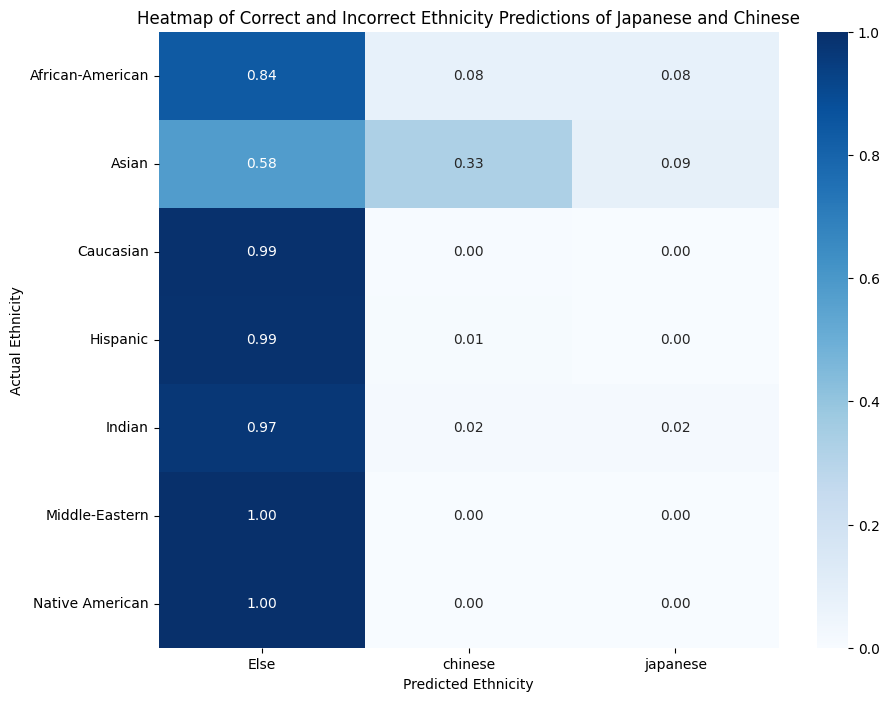

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
confusion_matrix = pd.crosstab(df_total["ethnicity_recode"], df_total["final_prediction"], normalize="index")

# Display the normalized confusion matrix
print(confusion_matrix)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt=".2f", cmap="Blues", cbar=True)

# Add labels and title
plt.title("Heatmap of Correct and Incorrect Ethnicity Predictions of Japanese and Chinese")

plt.xlabel("Predicted Ethnicity")
plt.ylabel("Actual Ethnicity")

# Show the plot
plt.show()


# Final Data Set

In [123]:
df_cleaned

,dirid,first,last,fullname,ethnicity,ethnicity_recode,names
0,1.0,james,preston,JAMES E PRESTON,C,Caucasian,james preston
28,2.0,charles,miller,CHARLES D MILLER,C,Caucasian,charles miller
48,3.0,philip,neal,PHILIP M NEAL,C,Caucasian,philip neal
67,4.0,peter,mullin,PETER W MULLIN,C,Caucasian,peter mullin
83,5.0,richard,ferry,RICHARD M FERRY,CAUCASIAN,Caucasian,richard ferry
...,...,...,...,...,...,...,...
294687,274771.0,kristen,ohara,KRISTEN O'HARA,CAUCASIAN,Caucasian,kristen ohara
294688,274775.0,kenneth,slutsky,KENNETH SLUTSKY,CAUCASIAN,Caucasian,kenneth slutsky
294689,276441.0,linda,yaccarino,LINDA YACCARINO,CAUCASIAN,Caucasian,linda yaccarino
294690,277023.0,gerald,chizever,GERALD CHIZEVER,CAUCASIAN,Caucasian,gerald chizever


In [125]:
import pandas as pd

df_8_model = pd.read_csv('/content/8_model_output.csv')

df_8_model

ethnicity_mapping = {
    "Celtic": "Caucasian",
    "European": "Caucasian",
    "African": "African American",
    "Hispanic": "Hispanic",
    "Nordic": "Caucasian",
    "EastAsian": "Asian",
    "SouthAsian": "Indian",
    "Muslim": "Middle-Eastern"
}

# Recode the column
df_8_model["ethnicity_predicted"] = df_8_model['predictions'].replace(ethnicity_mapping)

df_8_model["ethnicity_predicted"].value_counts()

,count
ethnicity_predicted,
Caucasian,29659
African American,4570
Hispanic,2011
Asian,695
Indian,561
Middle-Eastern,514


In [127]:

df_final = pd.merge(df_cleaned, df_8_model, on="names", how="left")

df_final["ethnicity_recode"].value_counts()

,count
ethnicity_recode,
Caucasian,31567
Unknown,17455
African-American,1516
Asian,643
Hispanic,413
Indian,68
Middle-Eastern,30
Other,19
Native American,2


In [128]:
df_final

,dirid,first,last,fullname,ethnicity,ethnicity_recode,names,predictions,confidences,ethnicity_predicted
0,1.0,james,preston,JAMES E PRESTON,C,Caucasian,james preston,Celtic,92.524,Caucasian
1,2.0,charles,miller,CHARLES D MILLER,C,Caucasian,charles miller,Celtic,76.863,Caucasian
2,2.0,charles,miller,CHARLES D MILLER,C,Caucasian,charles miller,Celtic,76.863,Caucasian
3,3.0,philip,neal,PHILIP M NEAL,C,Caucasian,philip neal,Celtic,90.280,Caucasian
4,4.0,peter,mullin,PETER W MULLIN,C,Caucasian,peter mullin,Celtic,78.508,Caucasian
...,...,...,...,...,...,...,...,...,...,...
51708,274771.0,kristen,ohara,KRISTEN O'HARA,CAUCASIAN,Caucasian,kristen ohara,African,65.355,African American
51709,274775.0,kenneth,slutsky,KENNETH SLUTSKY,CAUCASIAN,Caucasian,kenneth slutsky,Nordic,86.015,Caucasian
51710,276441.0,linda,yaccarino,LINDA YACCARINO,CAUCASIAN,Caucasian,linda yaccarino,Celtic,71.557,Caucasian
51711,277023.0,gerald,chizever,GERALD CHIZEVER,CAUCASIAN,Caucasian,gerald chizever,African,87.393,African American


In [135]:
df_final['ethnicity_recode'].value_counts()

,count
ethnicity_recode,
Caucasian,31567
Unknown,17455
African-American,1516
Asian,643
Hispanic,413
Indian,68
Middle-Eastern,30
Other,19
Native American,2


In [136]:
df_final['final_ethnicity'] = df_final['ethnicity_recode'].where(~df_final['ethnicity_recode'].isin(['Unknown', 'Other']), df_final['ethnicity_predicted'])
df_final[df_final["ethnicity_recode"].isin(["Unknown", 'Other'])]


,dirid,first,last,fullname,ethnicity,ethnicity_recode,names,predictions,confidences,ethnicity_predicted,final_ethnicity
52,50.0,wj,sanders,WJ SANDERS III,U,Unknown,wj sanders,European,77.654,Caucasian,Caucasian
53,51.0,richard,previte,RICHARD PREVITE,U,Unknown,richard previte,Celtic,73.483,Caucasian,Caucasian
128,126.0,david,arledge,DAVID A ARLEDGE,U,Unknown,david arledge,Celtic,88.627,Caucasian,Caucasian
251,229.0,robert,shapiro,ROBERT B SHAPIRO,UNKNOWN,Unknown,robert shapiro,African,86.938,African American,African American
252,229.0,robert,shapiro,ROBERT B SHAPIRO,UNKNOWN,Unknown,robert shapiro,African,86.938,African American,African American
...,...,...,...,...,...,...,...,...,...,...,...
50564,212988.0,aron,schwartz,ARON I. SCHWARTZ,UNKNOWN,Unknown,aron schwartz,European,83.144,Caucasian,Caucasian
50652,214307.0,enrique,silva,ENRIQUE SILVA,UNKNOWN,Unknown,enrique silva,Hispanic,97.736,Hispanic,Hispanic
51361,232224.0,richard,mansouri,RICHARD MANSOURI,UNKNOWN,Unknown,richard mansouri,Muslim,52.745,Middle-Eastern,Middle-Eastern
51362,232225.0,ken,pilot,KEN PILOT,UNKNOWN,Unknown,ken pilot,Hispanic,28.435,Hispanic,Hispanic


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [138]:
df_final["ethnicity_recode"].value_counts()

,count
ethnicity_recode,
Caucasian,31567
Unknown,17455
African-American,1516
Asian,643
Hispanic,413
Indian,68
Middle-Eastern,30
Other,19
Native American,2


In [142]:
df_final[df_final["final_ethnicity"]=="Asian"]

,dirid,first,last,fullname,ethnicity,ethnicity_recode,names,predictions,confidences,ethnicity_predicted,final_ethnicity
699,637.0,ray,irani,RAY R. IRANI,ASIAN,Asian,ray irani,Muslim,37.503,Middle-Eastern,Asian
1168,1139.0,nader,darehshori,NADER F DAREHSHORI,ASIAN,Asian,nader darehshori,Muslim,86.643,Middle-Eastern,Asian
1394,1379.0,hatim,tyabji,HATIM A TYABJI,ASIAN,Asian,hatim tyabji,Muslim,50.166,Middle-Eastern,Asian
1751,1757.0,hutham,olayan,HUTHAM S. OLAYAN,ASIAN,Asian,hutham olayan,African,93.773,African American,Asian
1752,1757.0,hutham,olayan,HUTHAM S. OLAYAN,ASIAN,Asian,hutham olayan,African,93.773,African American,Asian
...,...,...,...,...,...,...,...,...,...,...,...
51678,258056.0,thomas,lee,THOMAS LEE,ASIAN,Asian,thomas lee,Celtic,54.454,Caucasian,Asian
51679,258056.0,thomas,lee,THOMAS LEE,ASIAN,Asian,thomas lee,Celtic,54.454,Caucasian,Asian
51680,258056.0,thomas,lee,THOMAS LEE,ASIAN,Asian,thomas lee,Celtic,54.454,Caucasian,Asian
51681,258056.0,thomas,lee,THOMAS LEE,ASIAN,Asian,thomas lee,Celtic,54.454,Caucasian,Asian


In [145]:
df_final[(df_final['ethnicity_recode'].isin(['Unknown', 'Others'])) & (df_final['final_ethnicity'] == 'Asian')]

,dirid,first,last,fullname,ethnicity,ethnicity_recode,names,predictions,confidences,ethnicity_predicted,final_ethnicity
1933,1971.0,jane,hsiao,JANE HSIAO,U,Unknown,jane hsiao,EastAsian,68.312,Asian,Asian
5278,5802.0,kipling,hagopian,B KIPLING HAGOPIAN,U,Unknown,kipling hagopian,EastAsian,94.265,Asian,Asian
6465,7186.0,lee,asseo,LEE A ASSEO,U,Unknown,lee asseo,EastAsian,34.833,Asian,Asian
8566,10511.0,donald,zuk,DONALD J ZUK,U,Unknown,donald zuk,EastAsian,51.789,Asian,Asian
8792,10879.0,norman,nie,NORMAN NIE,U,Unknown,norman nie,EastAsian,70.527,Asian,Asian
...,...,...,...,...,...,...,...,...,...,...,...
49757,201528.0,takao,miyamoto,TAKAO MIYAMOTO,U,Unknown,takao miyamoto,EastAsian,99.934,Asian,Asian
49819,201571.0,denman,van,W DENMAN VAN NESS,U,Unknown,denman van,EastAsian,56.543,Asian,Asian
49911,201650.0,josiah,low,JOSIAH O LOW III,U,Unknown,josiah low,EastAsian,69.040,Asian,Asian
49912,201650.0,josiah,low,JOSIAH O LOW III,U,Unknown,josiah low,EastAsian,69.040,Asian,Asian


In [148]:
# correction by sampling

df_final.loc[df_final['names'] == "kipling hagopian",'final_ethnicity'] = 'Unknown'

df_final.loc[df_final['names'] == "donald zuk",'final_ethnicity'] = 'Unknown'

df_final.loc[df_final['names'] == "norman nie",'final_ethnicity'] = 'Unknown'

df_final.loc[df_final['names'] == "togo west",'final_ethnicity'] = 'Unknown'

df_final.loc[df_final['names'] == "wanda henton",'final_ethnicity'] = 'Unknown'

df_final.loc[df_final['names'] == "w van",'final_ethnicity'] = 'Unknown'

df_final.loc[df_final['names'] == "william mc",'final_ethnicity'] = 'Unknown'

df_final.loc[df_final['names'] == "waneta tuttle",'final_ethnicity'] = 'Unknown'

df_final.loc[df_final['names'] == "john mc",'final_ethnicity'] = 'Unknown'

df_final.loc[df_final['names'] == "simon de",'final_ethnicity'] = 'Unknown'

df_final.loc[df_final['names'] == "melvin van",'final_ethnicity'] = 'Unknown'

df_final.loc[df_final['names'] == "tami longaberger",'final_ethnicity'] = 'Unknown'

df_final.loc[df_final['names'] == "lee van",'final_ethnicity'] = 'Unknown'

df_final.loc[df_final['names'] == "eunice groark",'final_ethnicity'] = 'Unknown'

df_final.loc[df_final['names'] == "kam law",'final_ethnicity'] = 'Unknown'

df_final.loc[df_final['names'] == "jay sugarman",'final_ethnicity'] = 'Unknown'

df_final.loc[df_final['names'] == "anthony swanagan",'final_ethnicity'] = 'Unknown'


df_final.loc[df_final['names'] == "kevin o",'final_ethnicity'] = 'Unknown'

df_final.loc[df_final['names'] == "irwin gerson",'final_ethnicity'] = 'Unknown'


df_final.loc[df_final['names'] == "roy van",'final_ethnicity'] = 'Unknown'

df_final.loc[df_final['names'] == "isaiah harris",'final_ethnicity'] = 'Unknown'

df_final.loc[df_final['names'] == "nancy simonian",'final_ethnicity'] = 'Unknown'

df_final.loc[df_final['names'] == "john van",'final_ethnicity'] = 'Unknown'

df_final.loc[df_final['names'] == "wyatt engwall",'final_ethnicity'] = 'Unknown'

df_final.loc[df_final['names'] == "champlin sheridan",'final_ethnicity'] = 'Unknown'

df_final.loc[df_final['names'] == "bill st",'final_ethnicity'] = 'Unknown'


df_final.loc[df_final['names'] == "rw van",'final_ethnicity'] = 'Unknown'

df_final.loc[df_final['names'] == "edwin van",'final_ethnicity'] = 'Unknown'


df_final.loc[df_final['names'] == "denman van",'final_ethnicity'] = 'Unknown'

df_final.loc[df_final['names'] == "josiah low",'final_ethnicity'] = 'Unknown'

df_final.loc[df_final['names'] == "ej garn",'final_ethnicity'] = 'Unknown'



In [152]:
df_final_2 = df_final.drop_duplicates(subset=["dirid"])

df_final_2.to_csv("final_dataset_ethnicity.csv", index=False)

In [153]:
df_final_2

,dirid,first,last,fullname,ethnicity,ethnicity_recode,names,predictions,confidences,ethnicity_predicted,final_ethnicity
0,1.0,james,preston,JAMES E PRESTON,C,Caucasian,james preston,Celtic,92.524,Caucasian,Caucasian
1,2.0,charles,miller,CHARLES D MILLER,C,Caucasian,charles miller,Celtic,76.863,Caucasian,Caucasian
3,3.0,philip,neal,PHILIP M NEAL,C,Caucasian,philip neal,Celtic,90.280,Caucasian,Caucasian
4,4.0,peter,mullin,PETER W MULLIN,C,Caucasian,peter mullin,Celtic,78.508,Caucasian,Caucasian
5,5.0,richard,ferry,RICHARD M FERRY,CAUCASIAN,Caucasian,richard ferry,Celtic,80.348,Caucasian,Caucasian
...,...,...,...,...,...,...,...,...,...,...,...
51708,274771.0,kristen,ohara,KRISTEN O'HARA,CAUCASIAN,Caucasian,kristen ohara,African,65.355,African American,Caucasian
51709,274775.0,kenneth,slutsky,KENNETH SLUTSKY,CAUCASIAN,Caucasian,kenneth slutsky,Nordic,86.015,Caucasian,Caucasian
51710,276441.0,linda,yaccarino,LINDA YACCARINO,CAUCASIAN,Caucasian,linda yaccarino,Celtic,71.557,Caucasian,Caucasian
51711,277023.0,gerald,chizever,GERALD CHIZEVER,CAUCASIAN,Caucasian,gerald chizever,African,87.393,African American,Caucasian
